In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data for building a regression model

In [2]:
dt=pd.read_csv(r'D:\DSA\week7\Add_sales_data_2018.csv')

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [4]:
dt.shape

(205, 7)

In [5]:
dt.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [73]:
dt.describe() #Just to get an idea about the data

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


### Using scatter plot to chek the distribution of observed data

<function matplotlib.pyplot.show(close=None, block=None)>

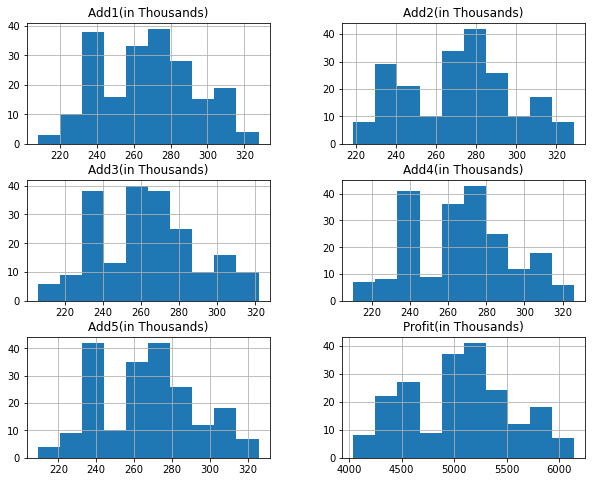

In [8]:
scattergraph = dt.select_dtypes(include=['int32','int64','float'])
scattergraph.hist (figsize=(10,8))
plt.show

### Using corr() function to find out the correlation between the ad agencies and the profit genrated

<AxesSubplot:>

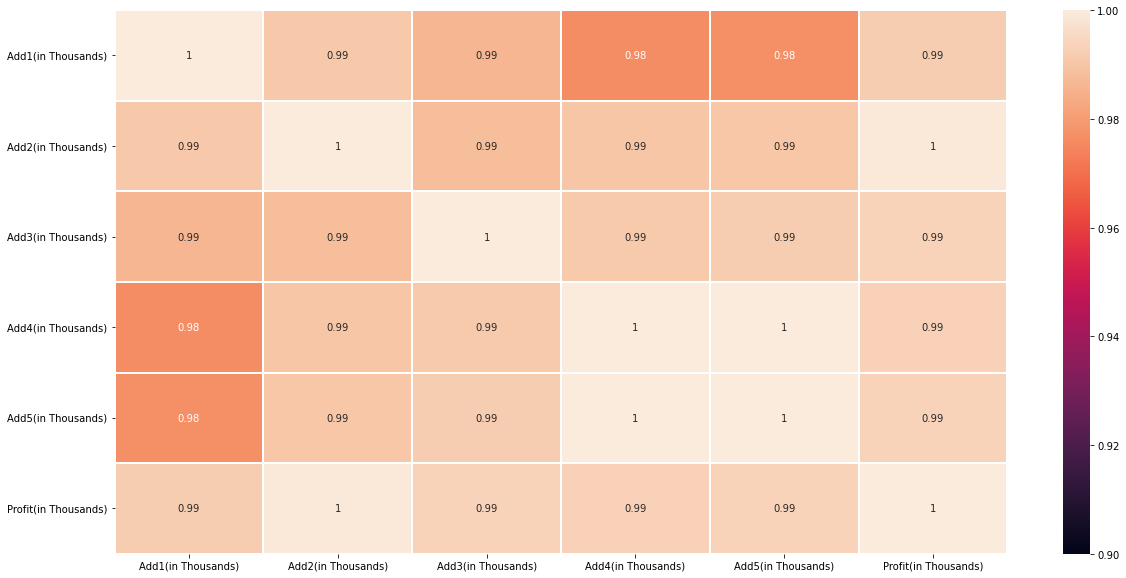

In [9]:
corr=dt.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corr, vmin=.9, vmax=1, annot=True, linewidth=.3)

- As is seen in the heat map, there is strong correlation between the ad agencies and the profit generated. 
- Since all the correlations are above 0.9, no coulmns have been dropped for further analysis

In [74]:
dt.columns

Index(['Date', 'Add1(in Thousands)', 'Add2(in Thousands)',
       'Add3(in Thousands)', 'Add4(in Thousands)', 'Add5(in Thousands)',
       'Profit(in Thousands)'],
      dtype='object')

In [51]:
dt1=dt.drop(['Date'],axis=1)
dt1.columns

Index(['Add1(in Thousands)', 'Add2(in Thousands)', 'Add3(in Thousands)',
       'Add4(in Thousands)', 'Add5(in Thousands)', 'Profit(in Thousands)'],
      dtype='object')

- Dropping the Date column which is of non numeric type from the dataset 

In [52]:
y=dt1['Profit(in Thousands)']
x=dt1.drop(['Profit(in Thousands)'], axis=1)

In [65]:
x.shape

(205, 5)

- New dataset 

### Building a regression model for the prediction of profit from the given data

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42, test_size=.25)

- Importing the train test split technique from sklearn to build the model
- And splitting the data for model training and testing

In [56]:
from sklearn import linear_model
lr=linear_model.LinearRegression()

- Creating an instance using linear regression function from the sklearn library

In [57]:
model=lr.fit(x_train,y_train)

- Model fitting 

In [58]:
pred=model.predict(x_test)

- Model prediction

In [60]:
y_test

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
95     4623.793
159    5384.175
162    5328.025
147    5175.051
182    5956.323
191    5780.799
164    4997.719
65     5075.858
175    5784.540
73     4936.120
152    5065.652
18     4190.965
82     5034.726
86     5015.536
143    5134.657
60     5145.131
101    5421.940
98     4569.293
30     4598.292
25     4436.321
16     4175.677
168    5616.791
195    5667.250
97     4648.834
194    5717.838
67     5001.615
120    5182.368
154    5017.503
202    5545.013
79     5013.207
69     5030.451
145    5108.626
55     4760.877
45     4606.340
84     4925.861
146    5250.788
66     5038.222
111    5491.792
153    5019.997
96     4647.356
38     4486.380
24     4435.174
139    5300.437
112    5425.190
29     4482.183
19     4193.095
178    6062.457
Name: Profit(in Thousands), dtype: float64

In [61]:
pred # The predicted values

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457])

In [62]:
from sklearn.metrics import mean_squared_error

In [63]:
print('MSE is', mean_squared_error(y_test,pred))

MSE is 6.999220567756388e-25


- Using the MSE method to validate the model
- The MSE value is very low and hence the model is nearly accurate

### A new set of values to predict the profit using the created model

In [69]:
x_test1=[[290,312,309,298,320]]
x_test1

[[290, 312, 309, 298, 320]]

- A 2D array is created with new set of values to predict the profit 

In [71]:
pred1=model.predict(x_test1)
pred1

C:\Users\psana\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5820.06])

- The model has predicted the value 5820.06 as profit if the ad agencies were given the amounts respectively
- This predication is fairly accurate as the MSE value of the model is very low